# V928 Tau - Fuzzy Disk

In this notebook we take the output of the stellar variation notebook and model the eclipse. We do this using the <strong>pyPplusS</strong> package designed by Rein & Odir 2019. We make the assumption that the two components of the binary are identical and thus that the deblended light curve just doubles the fluctuations about 1. Here we test the fuzzy disk model.

In [1]:
import emcee
import logging
import numpy as np
import astropy.units as u
import astropy.constants as c
import matplotlib.pyplot as plt
from Code import mcmc, eclipse

%matplotlib inline

## Load the Data

In [2]:
time, flux_b, flux, error = eclipse.load_data('data/photometry/eclipse_lightcurve.txt')

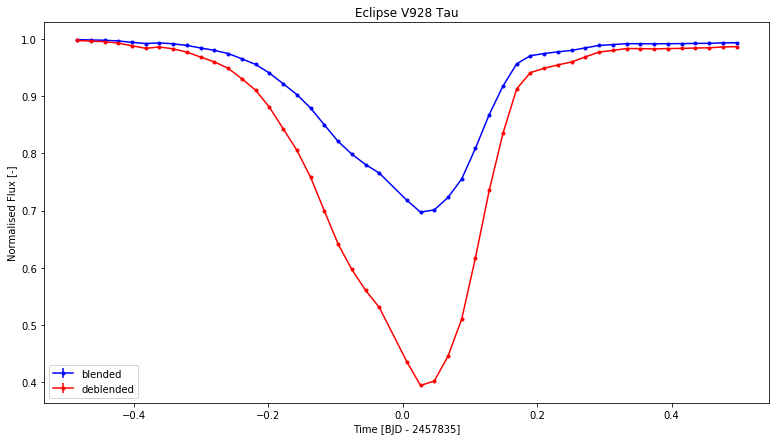

In [3]:
plt.figure(figsize=(13, 7))
plt.title('Eclipse V928 Tau')
plt.xlabel('Time [BJD - 2457835]')
plt.ylabel('Normalised Flux [-]')
plt.errorbar(time, flux_b, yerr=error, fmt='.', color='b', ls='-', label='blended')
plt.errorbar(time, flux, yerr=error, fmt='.', color='r', ls='-', label='deblended')
plt.legend()
plt.show()

## Model Set-up

This takes the <strong>disk_model()</strong> function from <strong>eclipse_functions</strong>, and creates sub-functions for the fuzzy disk model.

In [4]:
# model functions
fuzzy_disk       = eclipse.disk_model
fuzzy_prior       = eclipse.disk_prior

In [5]:
# Bounds of the parameters (t = tilt, T = tau, rest as above)
rl, ru = (0., 10.)
bl, bu = (-10.,10.)
il, iu = (0., np.pi/2.)
tl, tu = (0., np.pi/2.)
vl, vu = (5.9, 20.)
xl, xu = (-10.,10.)
Tl, Tu = (0.,1.)

## Fuzzy Disk

The fuzzy disk is a two component disk model which is ended to have an opaque centre (as above) and then an extended edge that is expected to be relatively transparent.

In [8]:
# setting up labels, units and bounds for the fuzzy disk
lbls_fd = ['disk radius', 'edge thickness', 'impact parameter', 'inclination', 'tilt', 
           'velocity', 'time shift', 'disk opacity', 'edge opacity']
units_fd = ['R*', 'R*', 'R*', 'deg', 'deg', 'R*/day', 'day', '-', '-']
bounds_fd = [(rl, ru/2.), (rl, ru/2.), (bl/2., bu/2.), (iu/2., iu), (tl, tu), (vl, vu/2.), 
             (-0.5, 0.5), (Tu/2., Tu), (Tl, Tu/2.)]

# setting up intial guess for the fuzzy disk
args_fd = (9, 1000, bounds_fd)
p0_fd = eclipse.useful_p0(mcmc.bounded_p0, args_fd, fuzzy_disk, time, True, 5)


  1%|          | 7/1000 [00:00<00:14, 68.98it/s]

round 1 from 0 to 70 (max = 1000)


  1%|          | 7/1000 [00:00<00:14, 66.53it/s]

round 2 from 70 to 137 (max = 1000)


  1%|          | 6/1000 [00:00<00:16, 59.16it/s]

round 3 from 137 to 211 (max = 1000)


  1%|          | 7/1000 [00:00<00:16, 60.29it/s]

round 4 from 211 to 270 (max = 1000)


  1%|          | 7/1000 [00:00<00:15, 65.51it/s]

round 5 from 270 to 343 (max = 1000)


  1%|          | 7/1000 [00:00<00:14, 67.07it/s]

round 6 from 343 to 413 (max = 1000)


  1%|          | 7/1000 [00:00<00:15, 63.30it/s]

round 7 from 413 to 475 (max = 1000)


  1%|          | 7/1000 [00:00<00:14, 68.91it/s]

round 8 from 475 to 547 (max = 1000)


  1%|          | 7/1000 [00:00<00:15, 65.97it/s]

round 9 from 547 to 611 (max = 1000)


  1%|          | 7/1000 [00:00<00:14, 68.49it/s]

round 10 from 611 to 686 (max = 1000)


  1%|          | 7/1000 [00:00<00:14, 66.42it/s]

round 11 from 686 to 753 (max = 1000)


  1%|          | 7/1000 [00:00<00:14, 67.23it/s]

round 12 from 753 to 830 (max = 1000)


  1%|          | 7/1000 [00:00<00:15, 63.96it/s]

round 13 from 830 to 900 (max = 1000)


  1%|          | 7/1000 [00:00<00:14, 69.63it/s]

round 14 from 900 to 960 (max = 1000)


  0%|          | 2/1000 [00:00<01:09, 14.38it/s]

round 15 from 960 to 1000 (max = 1000)


  3%|▎         | 7/246 [00:00<00:03, 63.85it/s]

USEFUL ROUND 1 FROM 0 TO 754 (MAX = 1000)



  3%|▎         | 7/246 [00:00<00:03, 62.82it/s]

round 1 from 0 to 22 (max = 246)


  3%|▎         | 7/246 [00:00<00:03, 65.92it/s]

round 2 from 22 to 32 (max = 246)


  2%|▏         | 6/246 [00:00<00:04, 59.47it/s]

round 3 from 32 to 45 (max = 246)


  3%|▎         | 7/246 [00:00<00:03, 66.60it/s]

round 4 from 45 to 62 (max = 246)


  3%|▎         | 7/246 [00:00<00:03, 68.35it/s]

round 5 from 62 to 77 (max = 246)


  6%|▌         | 14/246 [00:00<00:03, 68.74it/s]

round 6 from 77 to 94 (max = 246)


  3%|▎         | 7/246 [00:00<00:03, 68.78it/s]

round 7 from 94 to 118 (max = 246)


  3%|▎         | 7/246 [00:00<00:03, 68.75it/s]

round 8 from 118 to 138 (max = 246)


  3%|▎         | 7/246 [00:00<00:03, 69.76it/s]

round 9 from 138 to 162 (max = 246)


  3%|▎         | 7/246 [00:00<00:03, 62.59it/s]

round 10 from 162 to 178 (max = 246)


  3%|▎         | 8/246 [00:00<00:03, 72.83it/s]

round 11 from 178 to 195 (max = 246)


  3%|▎         | 7/246 [00:00<00:03, 64.47it/s]

round 12 from 195 to 214 (max = 246)


  3%|▎         | 7/246 [00:00<00:03, 63.13it/s]

round 13 from 214 to 225 (max = 246)


  3%|▎         | 7/246 [00:00<00:03, 66.32it/s]

round 14 from 225 to 234 (max = 246)


  0%|          | 0/246 [00:00<?, ?it/s]

round 15 from 234 to 246 (max = 246)


 12%|█▎        | 7/56 [00:00<00:00, 68.75it/s]

USEFUL ROUND 2 FROM 754 TO 944 (MAX = 1000)



 12%|█▎        | 7/56 [00:00<00:00, 66.41it/s]

round 1 from 0 to 2 (max = 56)


 12%|█▎        | 7/56 [00:00<00:00, 68.44it/s]

round 2 from 2 to 8 (max = 56)


 12%|█▎        | 7/56 [00:00<00:00, 63.32it/s]

round 3 from 8 to 12 (max = 56)


 14%|█▍        | 8/56 [00:00<00:00, 70.91it/s]

round 4 from 12 to 13 (max = 56)


 12%|█▎        | 7/56 [00:00<00:00, 69.99it/s]

round 5 from 13 to 17 (max = 56)


 12%|█▎        | 7/56 [00:00<00:00, 67.84it/s]

round 6 from 17 to 18 (max = 56)


 12%|█▎        | 7/56 [00:00<00:00, 65.73it/s]

round 7 from 18 to 21 (max = 56)


 12%|█▎        | 7/56 [00:00<00:00, 62.83it/s]

round 8 from 21 to 24 (max = 56)


 14%|█▍        | 8/56 [00:00<00:00, 76.74it/s]

round 9 from 24 to 28 (max = 56)


 12%|█▎        | 7/56 [00:00<00:00, 68.08it/s]

round 10 from 28 to 31 (max = 56)


 14%|█▍        | 8/56 [00:00<00:00, 70.68it/s]

round 11 from 31 to 37 (max = 56)


 12%|█▎        | 7/56 [00:00<00:00, 66.35it/s]

round 12 from 37 to 42 (max = 56)


 12%|█▎        | 7/56 [00:00<00:00, 65.90it/s]

round 13 from 42 to 47 (max = 56)


 12%|█▎        | 7/56 [00:00<00:00, 64.58it/s]

round 14 from 47 to 48 (max = 56)


 12%|█▎        | 7/56 [00:00<00:00, 65.31it/s]

round 15 from 48 to 52 (max = 56)


 12%|█▎        | 7/56 [00:00<00:00, 64.52it/s]

round 16 from 52 to 54 (max = 56)


  0%|          | 0/56 [00:00<?, ?it/s]

round 17 from 54 to 56 (max = 56)


  0%|          | 0/9 [00:00<?, ?it/s]

USEFUL ROUND 3 FROM 944 TO 991 (MAX = 1000)



  0%|          | 0/9 [00:00<?, ?it/s]

round 1 from 0 to 1 (max = 9)
round 2 from 1 to 3 (max = 9)


  0%|          | 0/9 [00:00<?, ?it/s]

round 3 from 3 to 4 (max = 9)
round 4 from 4 to 5 (max = 9)


  0%|          | 0/9 [00:00<?, ?it/s]

round 5 from 5 to 6 (max = 9)
round 6 from 6 to 7 (max = 9)


  0%|          | 0/9 [00:00<?, ?it/s]

round 7 from 7 to 8 (max = 9)
round 8 from 8 to 9 (max = 9)


100%|██████████| 2/2 [00:00<00:00, 61.00it/s]

USEFUL ROUND 4 FROM 991 TO 998 (MAX = 1000)




  0%|          | 0/2 [00:00<?, ?it/s]

round 1 from 0 to 1 (max = 2)


 50%|█████     | 1/2 [00:00<00:00,  5.61it/s]

round 2 from 1 to 2 (max = 2)


 50%|█████     | 1/2 [00:00<00:00,  3.70it/s]

USEFUL ROUND 5 FROM 998 TO 1000 (MAX = 1000)



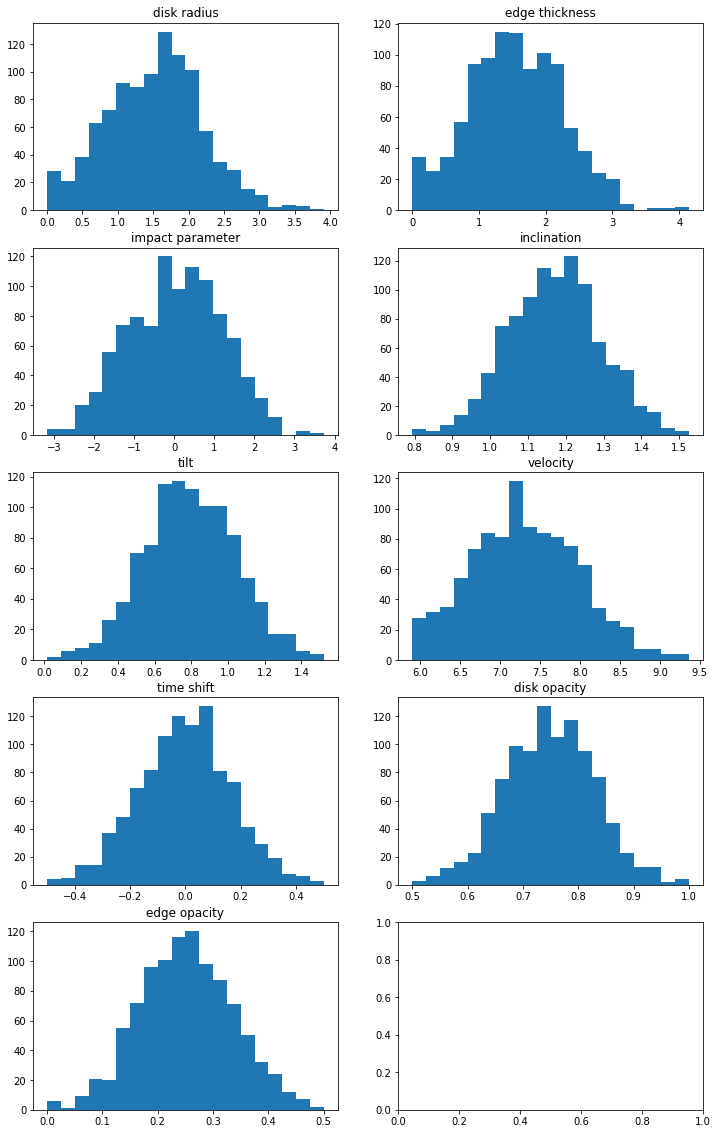

In [9]:
mcmc.plot_hist(p0_fd, lbls_fd)

In [10]:
# mcmc parameters for the fuzzy disk
be_fd = 'models/mcmc_backends/fuzzy_disk_new.h5'
mcmc_args_fd = (time, flux, error, fuzzy_disk, fuzzy_prior)
BE_fd = emcee.backends.HDFBackend(be_fd)

# run mcmc for the fuzzy disk
p_fd, sampler_fd = mcmc.run_mcmc(*mcmc_args_fd, p0_fd, 3499, reset=False, savename=be_fd)

# load mcmc for the fuzzy disk
sampler_fd = emcee.EnsembleSampler(1000, 9, mcmc.lnprob, args=mcmc_args_fd, backend=BE_fd)

100%|██████████| 3499/3499 [81:41:01<00:00, 84.04s/it]    


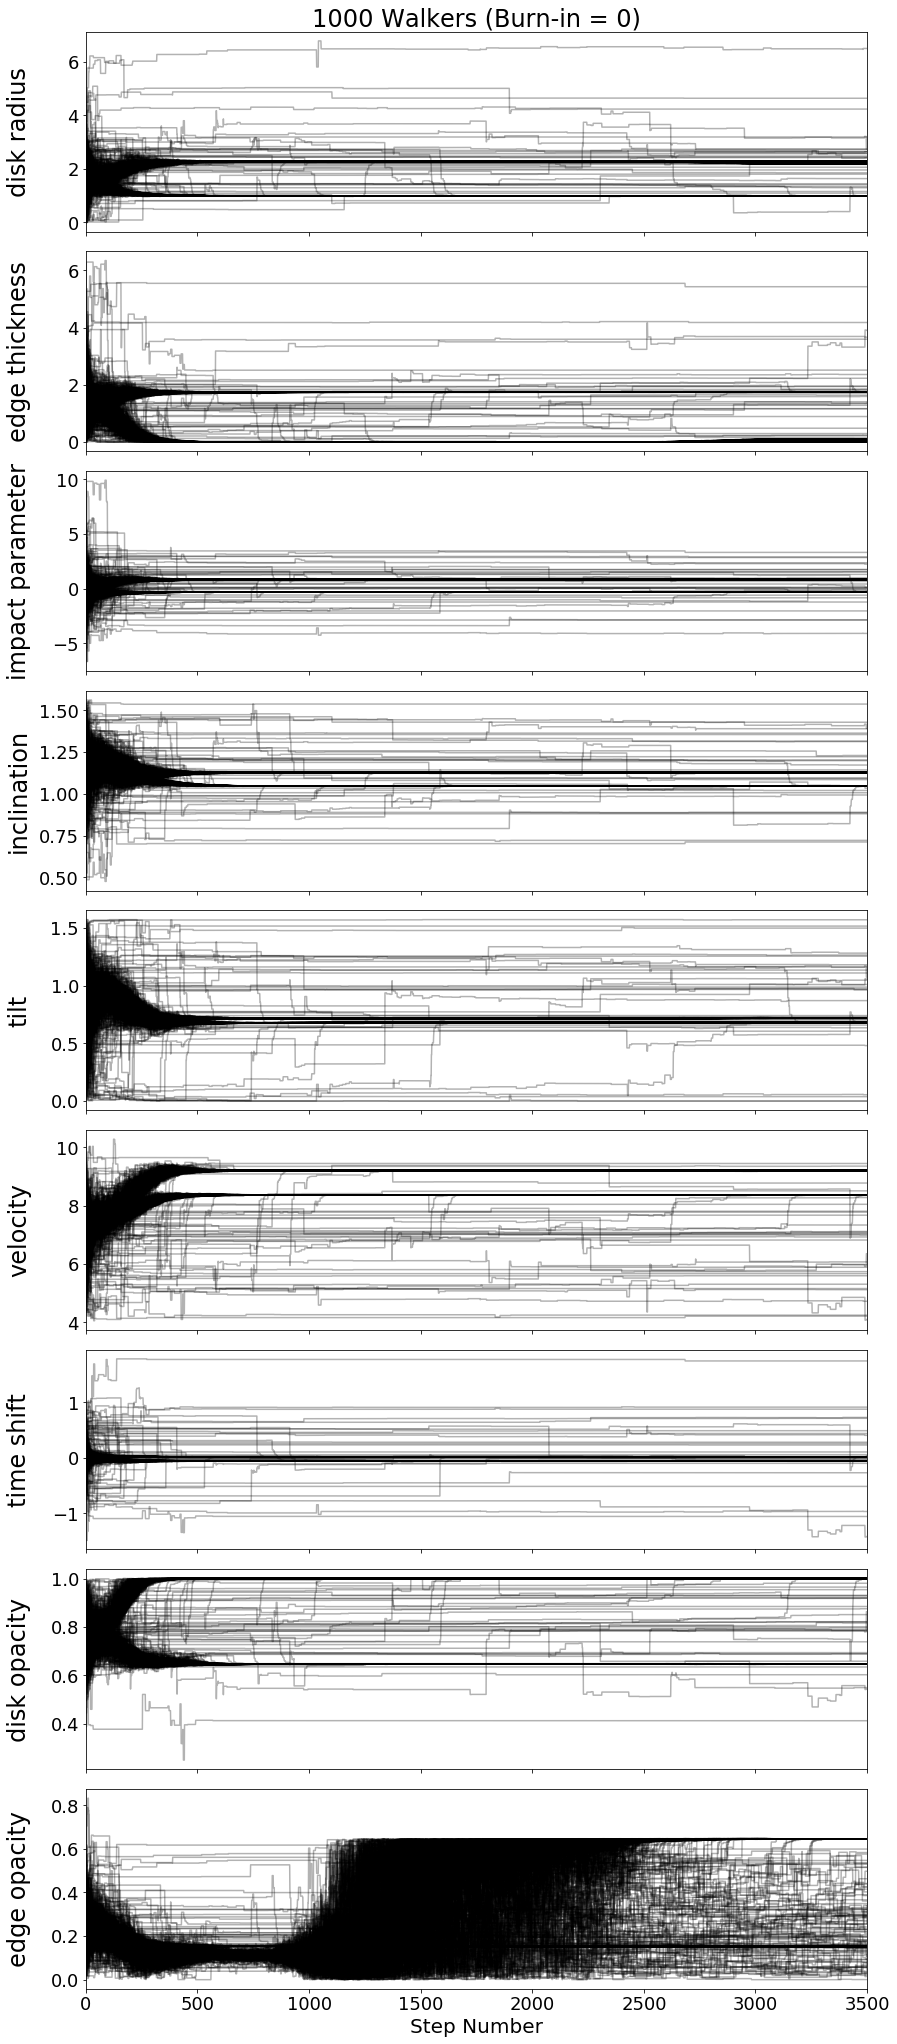

In [11]:
# plot the walkers for the fuzzy disk
mcmc.plot_walkers(sampler_fd, lbls=lbls_fd)

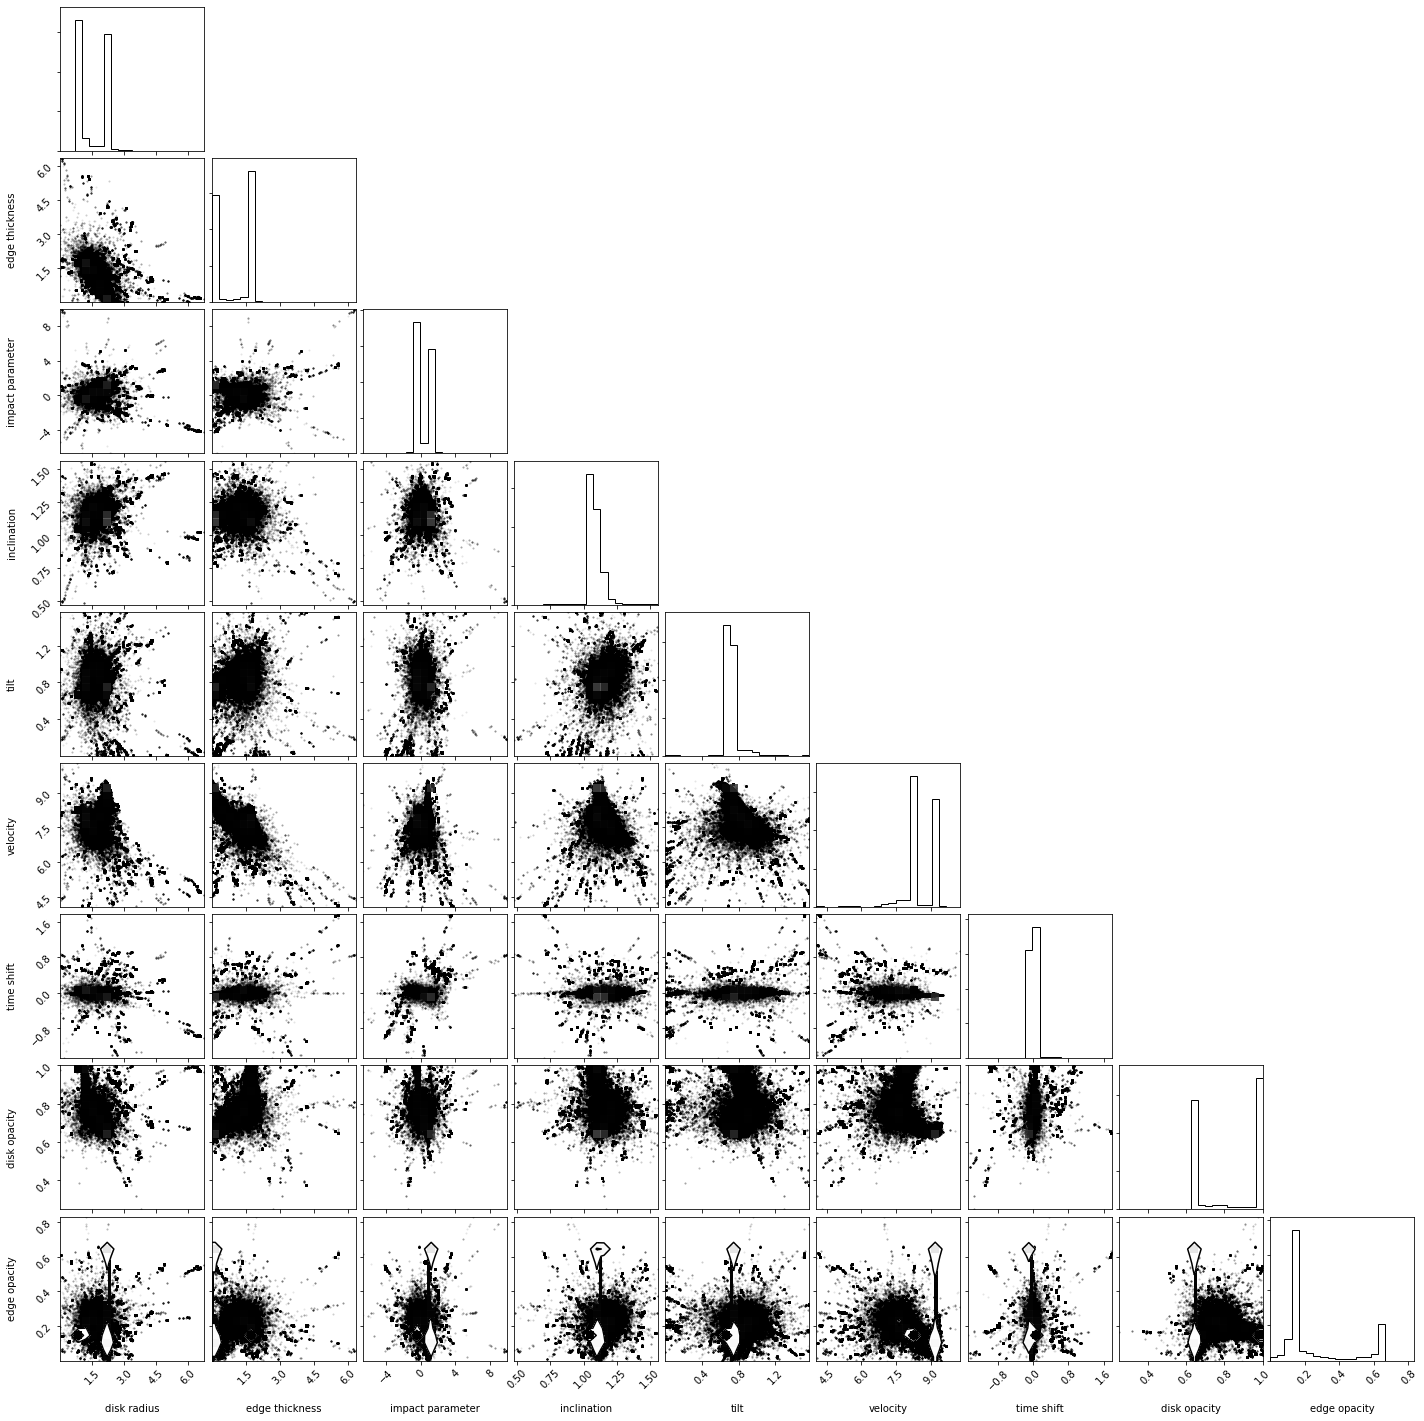

In [12]:
# plot the triangle for the fuzzy disk
mcmc.plot_triangle(sampler_fd, lbls=lbls_fd)

There are quite a couple of splits here: disk radius, velocity, disk and edge opacity. We start as for the opaque disk with the velocity split.

### Extracting Solutions (Velocity) for the Fuzzy Disk

Here we extract solutions with velocities below and above 8.5 $R_* \, \mathrm{day}^{-1}$.

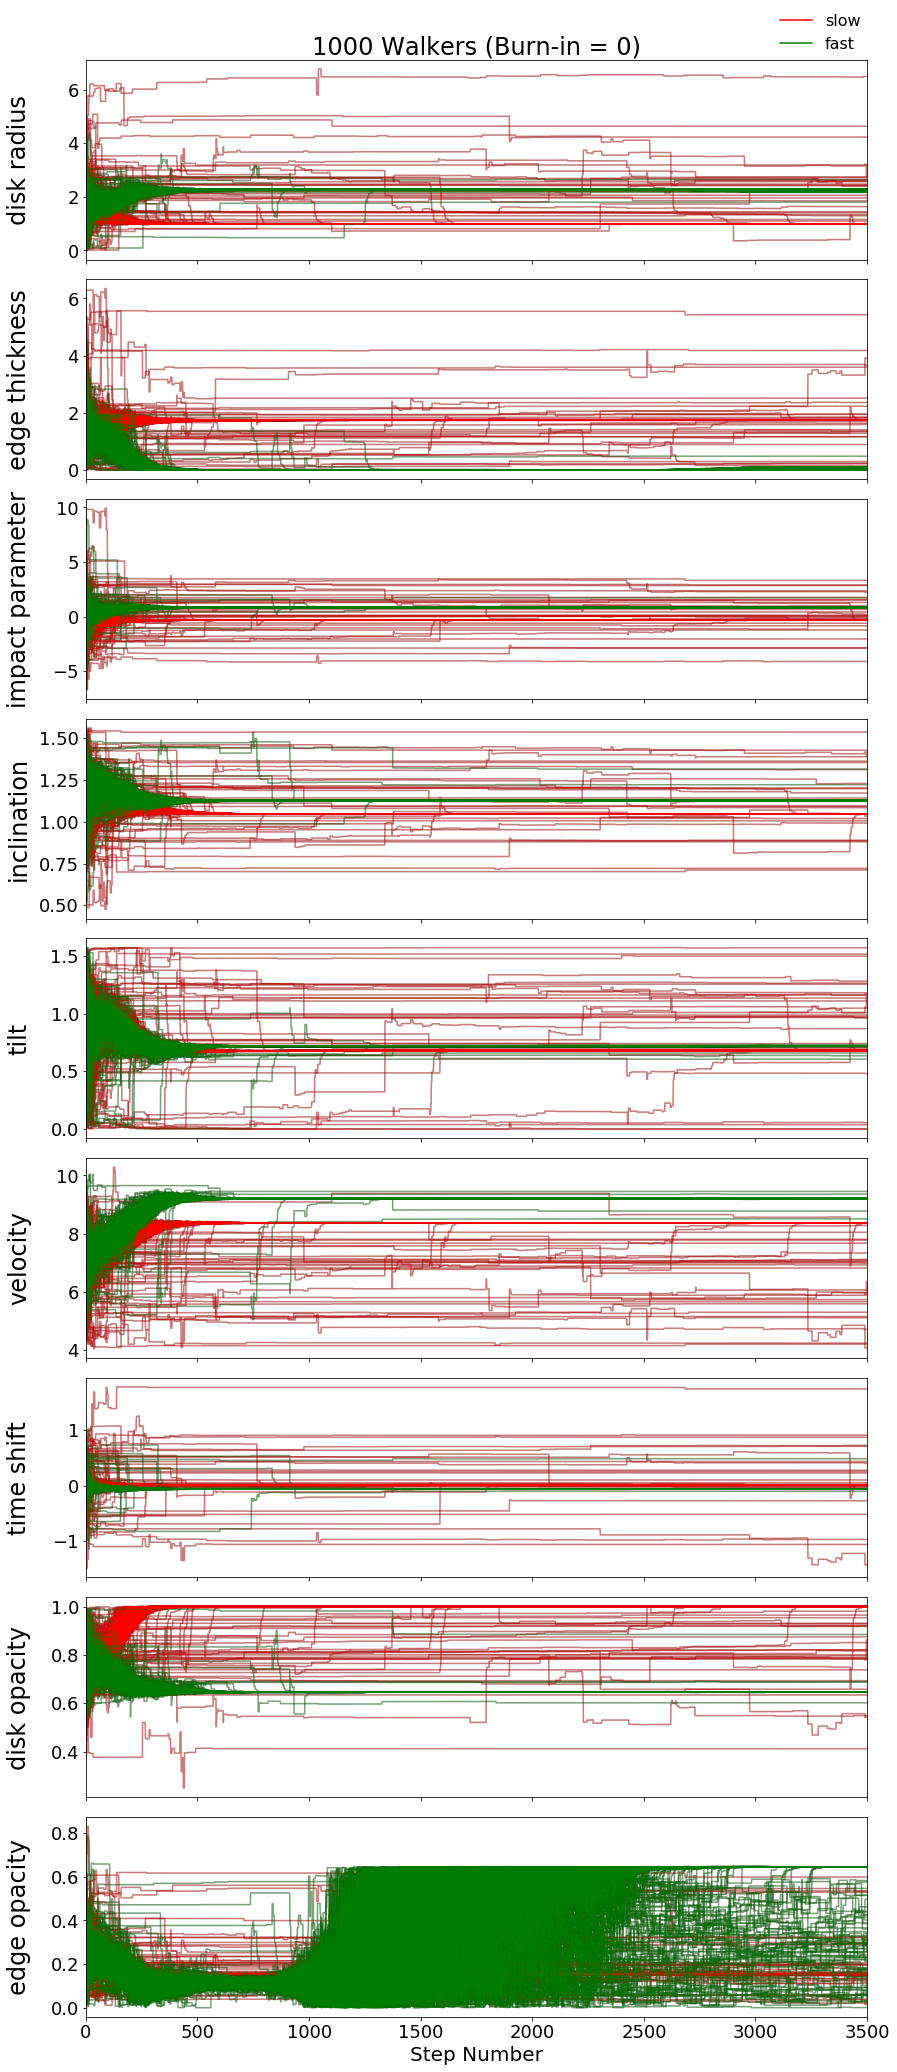

In [13]:
# extracting disk opacity radius for the fuzzy disk
v_names_fd = ['slow', 'fast']
vl_fd, vh_fd,  = mcmc.extract_solutions(sampler_fd, [5, 5], [(0., 8.5), (8.5, 20.)],
                                                0, lbls_fd, v_names_fd)

#### Low Velocity Solutions for the Fuzzy Disk

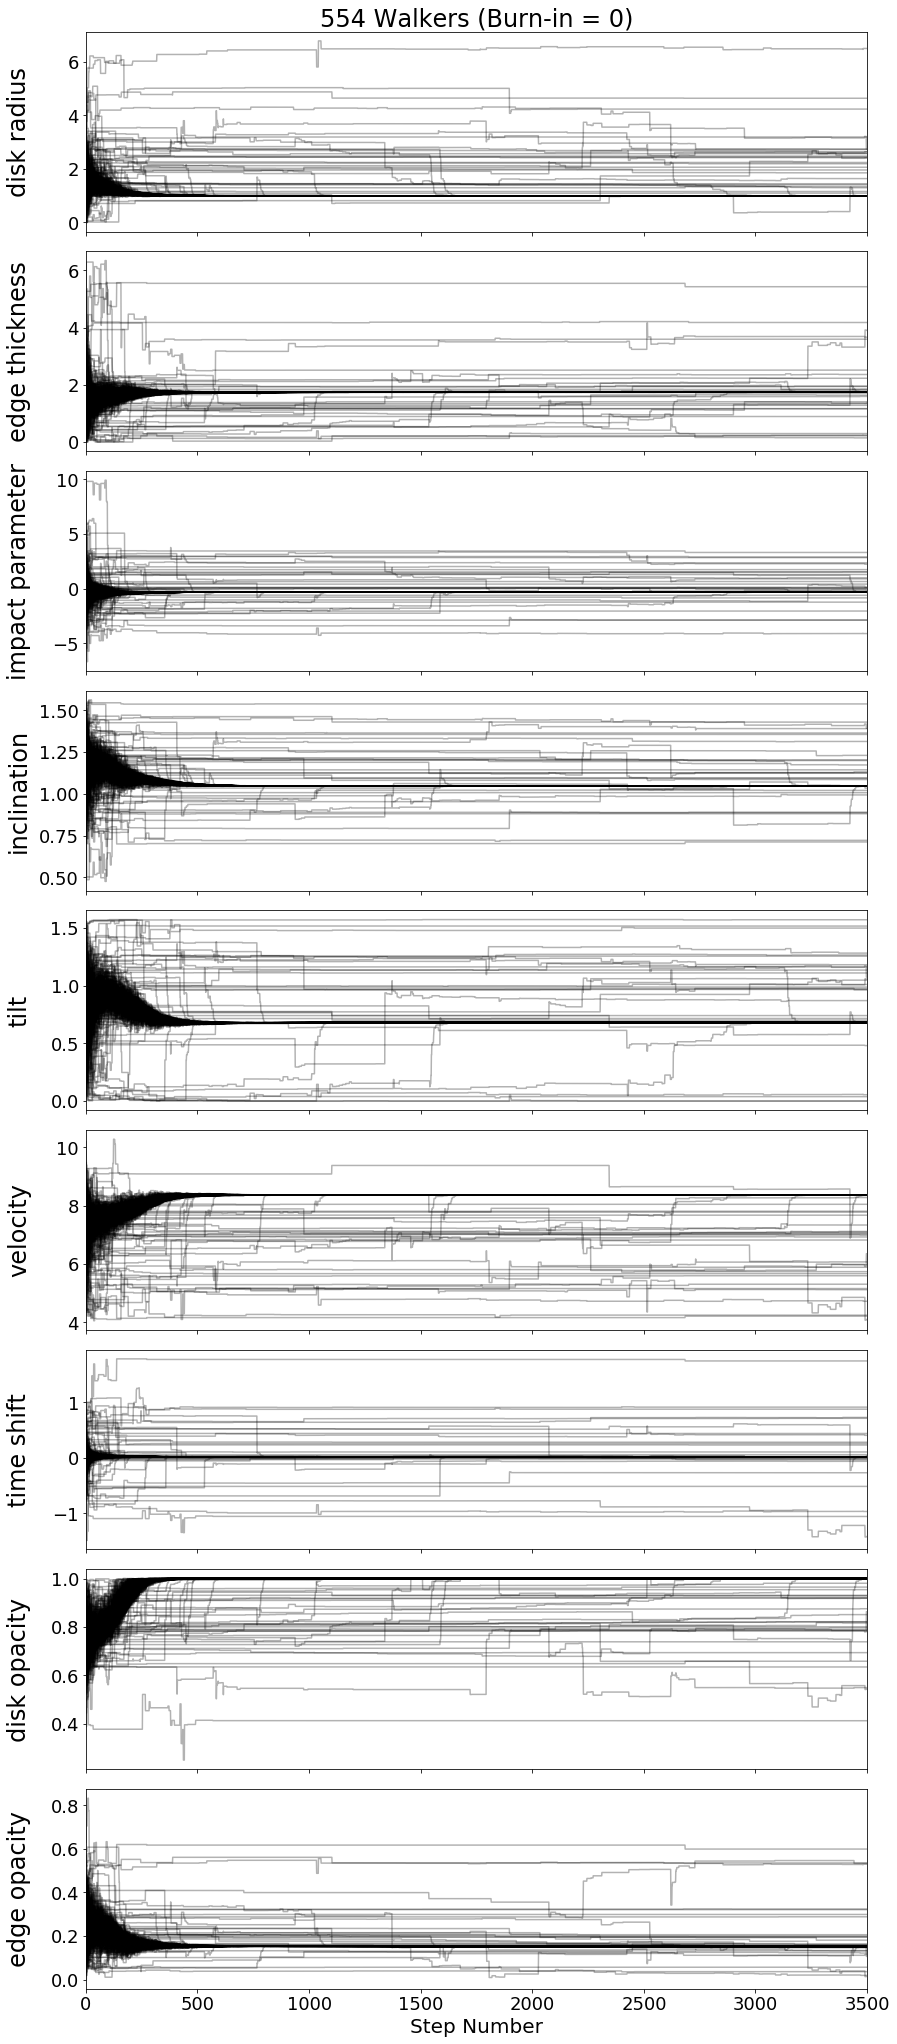

In [14]:
# plot the low velocity walkers for the fuzzy disk
mcmc.plot_walkers(vl_fd, 0, lbls_fd)

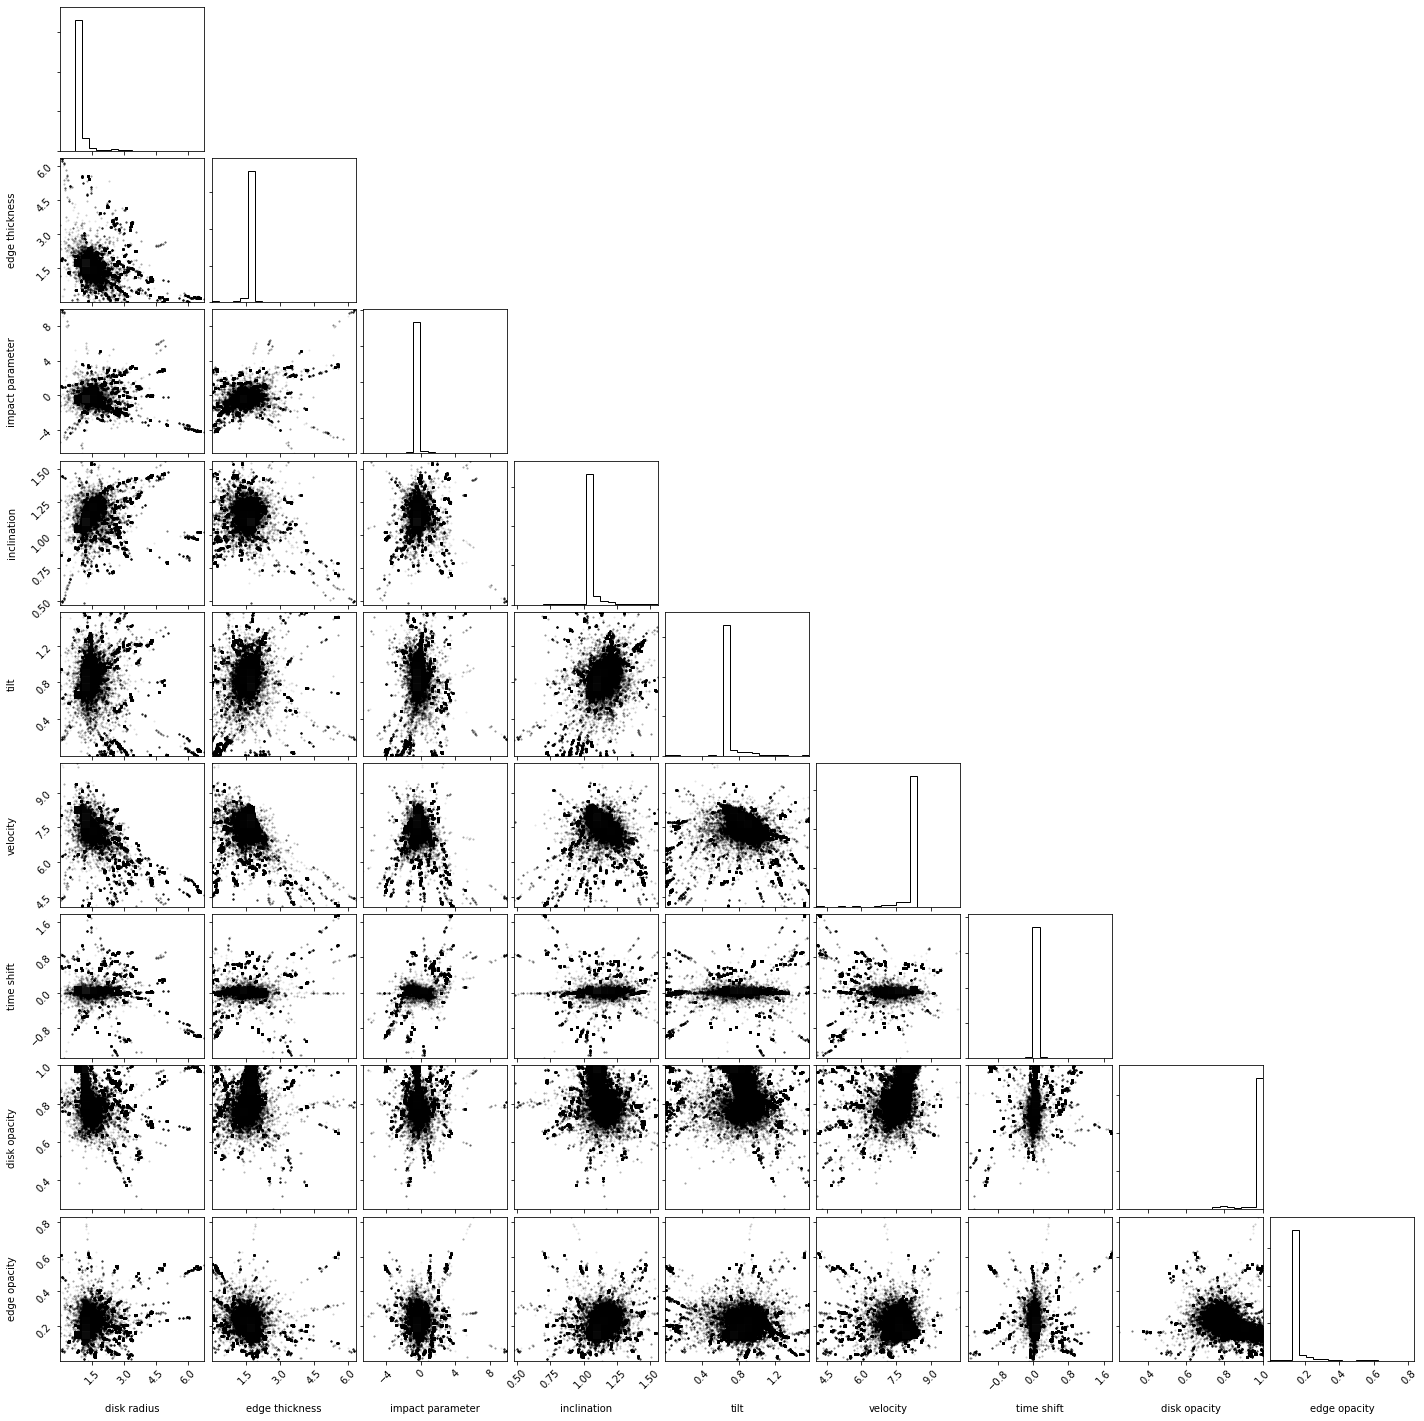

In [15]:
# plot the low velocity triangle for the fuzzy disk
mcmc.plot_triangle(vl_fd, 0, lbls_fd)

Clearly one solution.

100%|██████████| 500/500 [01:36<00:00,  5.16it/s]


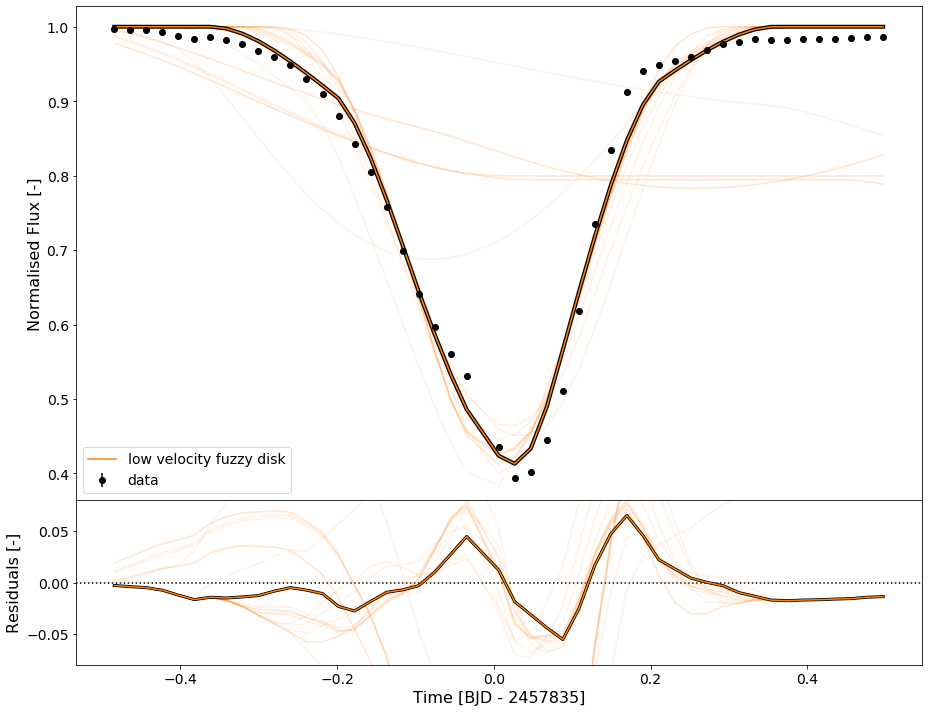

In [16]:
# determine burn-in for the low velocity solutions for the fuzzy disk
cut_vl_fd = 1000

# carry out statistics for the low velocity solutions for the fuzzy disk
stats_vl_fd, pb_vl_fd = mcmc.stats(vl_fd, cut=cut_vl_fd)

# plot the samples for the low velocity solutions for the fuzzy disk
_ = mcmc.plot_samples(time, flux, error, [fuzzy_disk], [vl_fd], ['low velocity fuzzy disk'], cut_vl_fd, 500, 
                 best_fit=True, dt=3002, residual_lims=(-0.08,0.08))

In [17]:
# print the best fit parameters for the low velocity low disk radii solutions for the fuzzy disk
mcmc.print_parameters(pb_vl_fd, lbls_fd, units_fd)

disk radius        =     +0.989952     [R*]
edge thickness     =     +1.744040     [R*]
impact parameter   =     -0.313036     [R*]
inclination        =     +59.94680     [deg]
tilt               =     +38.83989     [deg]
velocity           =     +8.363741     [R*/day]
time shift         =     +0.016443     [day]
disk opacity       =     +1.000000     [-]
edge opacity       =     +0.153539     [-]


#### High Velocity Solutions for the Fuzzy Disk

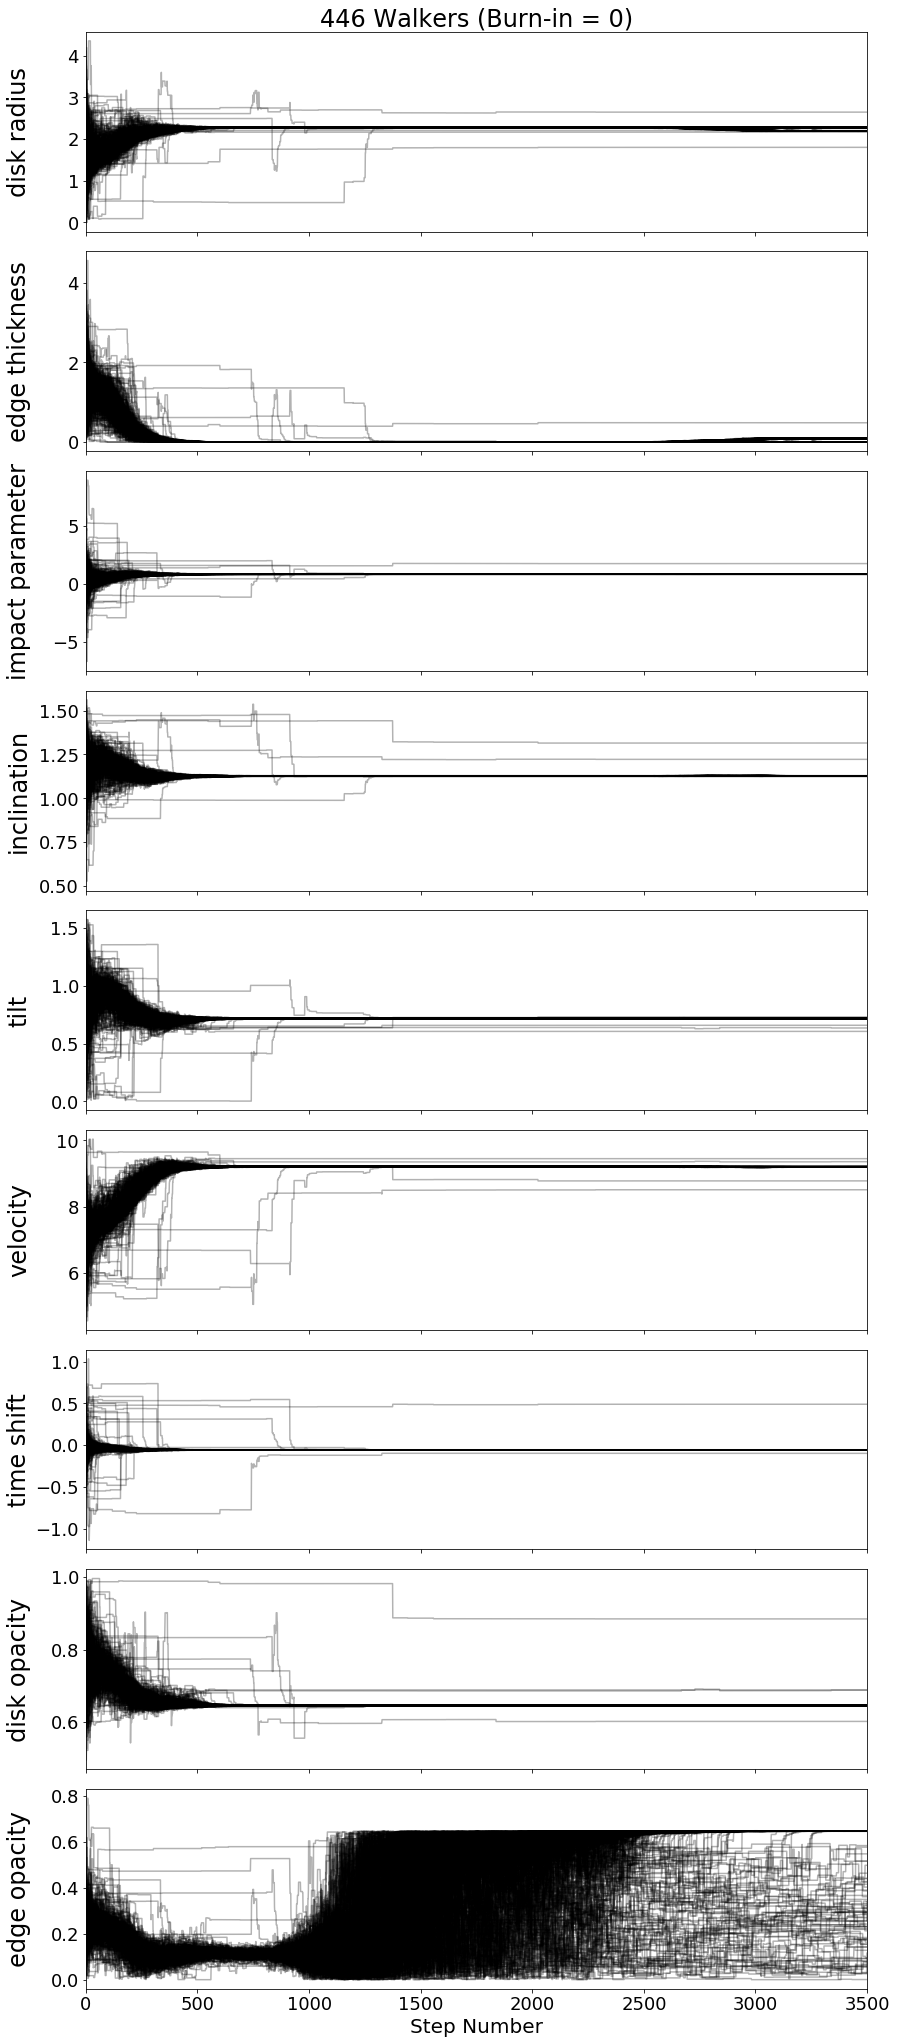

In [18]:
# plot the high velocity walkers for the fuzzy disk
mcmc.plot_walkers(vh_fd, 0, lbls_fd)

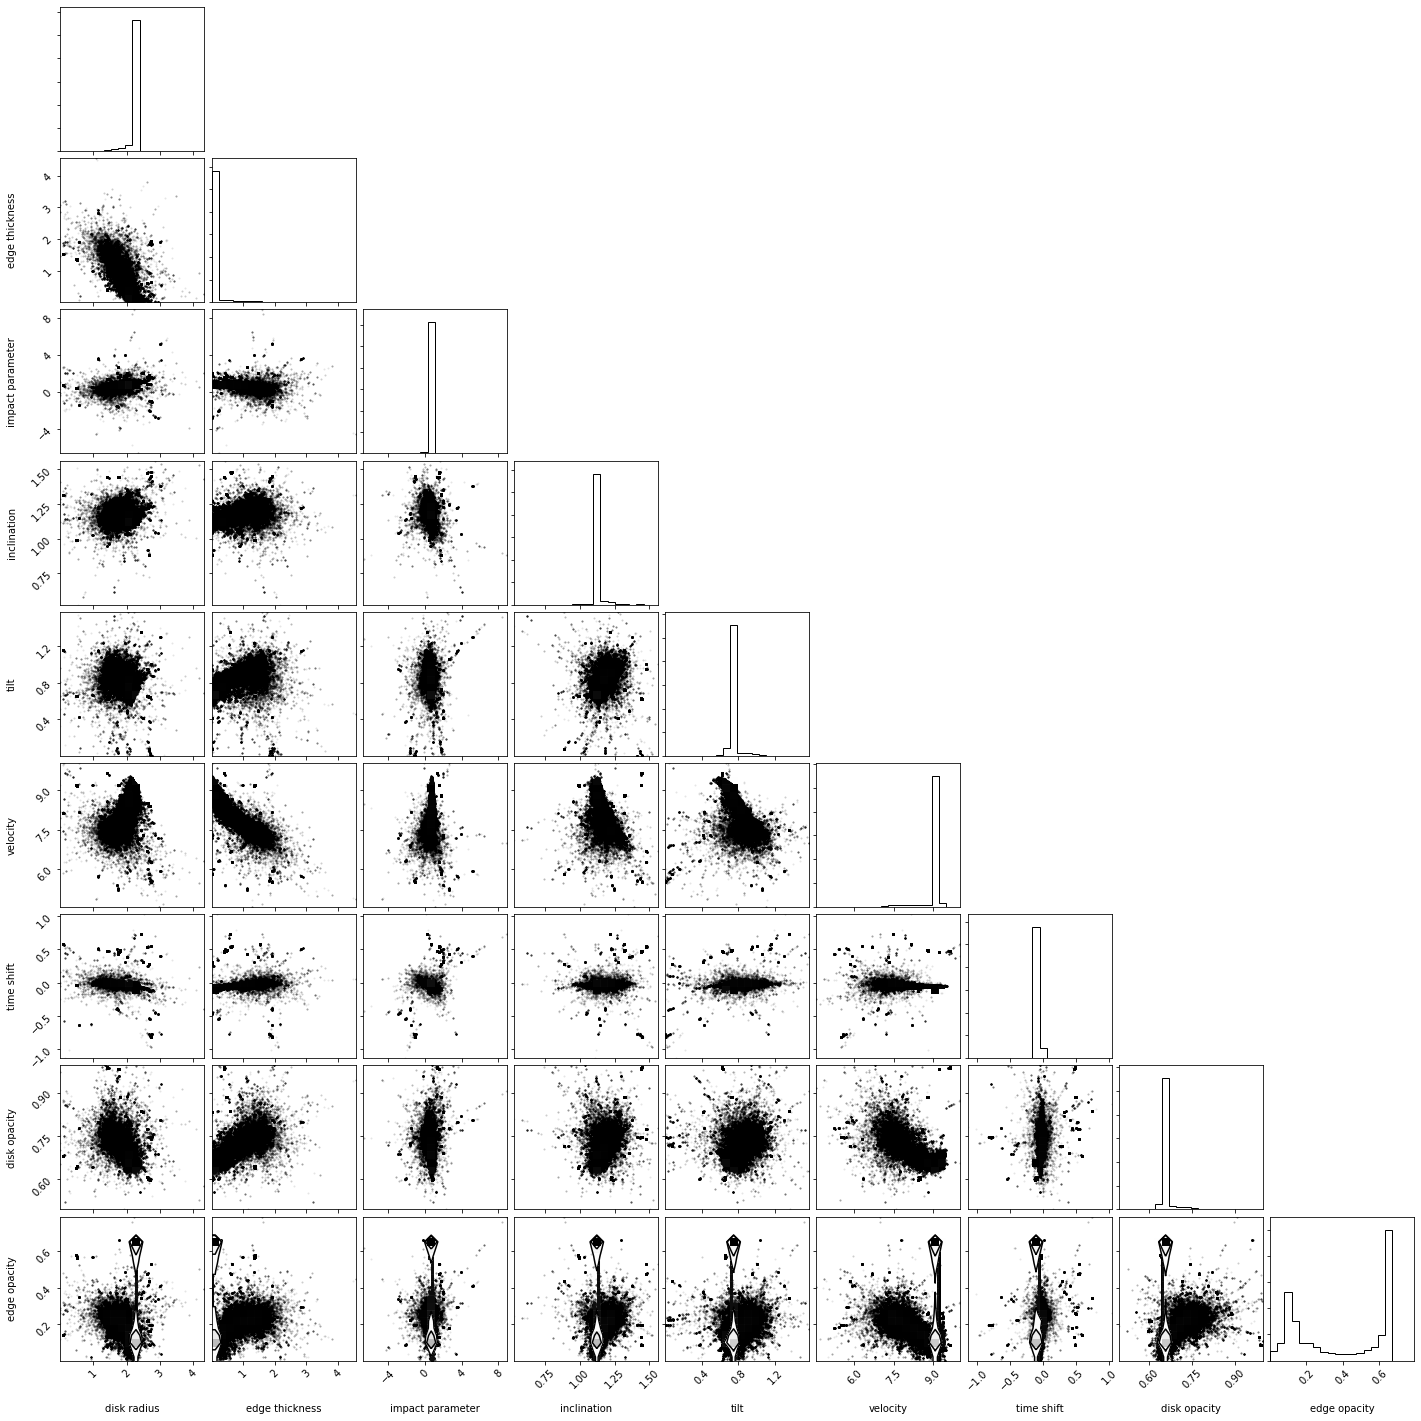

In [19]:
# plot the high velocity triangle for the fuzzy disk
mcmc.plot_triangle(vh_fd, lbls=lbls_fd)

In the triangle plot all parameters converge to one solution, with the exception of the edge opacity. Note that the walker plot shows that the walkers move from $\sim$0.15 to $\sim$0.65, but at the end (after a burn-in) they are all at the higher value. For this reason there is also but one solution (just a much larger burn-in value).

100%|██████████| 500/500 [01:52<00:00,  4.45it/s]


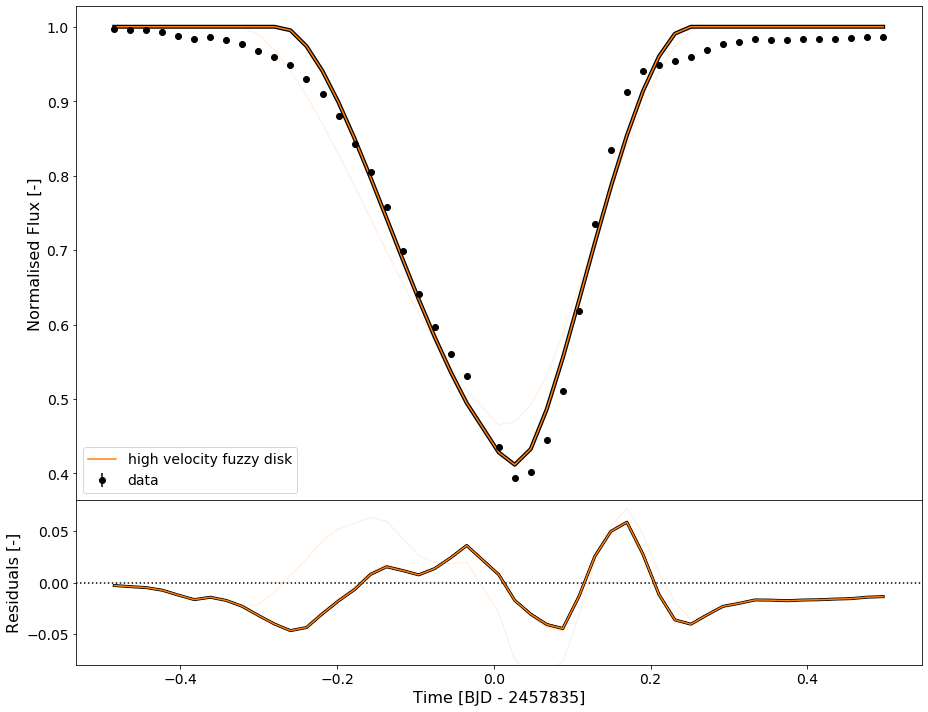

In [20]:
# determine burn-in for the high velocity solutions for the fuzzy disk
cut_vh_fd = 2500

# carry out statistics for the high velocity solutions for the fuzzy disk
stats_vh_fd, pb_vh_fd = mcmc.stats(vh_fd, cut=cut_vh_fd)

# plot the samples for the high velocity solutions for the fuzzy disk
_ = mcmc.plot_samples(time, flux, error, [fuzzy_disk], [vh_fd], ['high velocity fuzzy disk'], cut_vh_fd, 500, 
                 best_fit=True, dt=3002, residual_lims=(-0.08,0.08))

In [21]:
# print the best fit parameters for the high velocity low disk radii solutions for the fuzzy disk
mcmc.print_parameters(pb_vh_fd, lbls_fd, units_fd)

disk radius        =     +2.226520     [R*]
edge thickness     =     +0.051511     [R*]
impact parameter   =     +0.828510     [R*]
inclination        =     +64.60101     [deg]
tilt               =     +41.13838     [deg]
velocity           =     +9.200504     [R*/day]
time shift         =     -0.058869     [day]
disk opacity       =     +0.646174     [-]
edge opacity       =     +0.645576     [-]


### Compare Fuzzy Disk Solutions

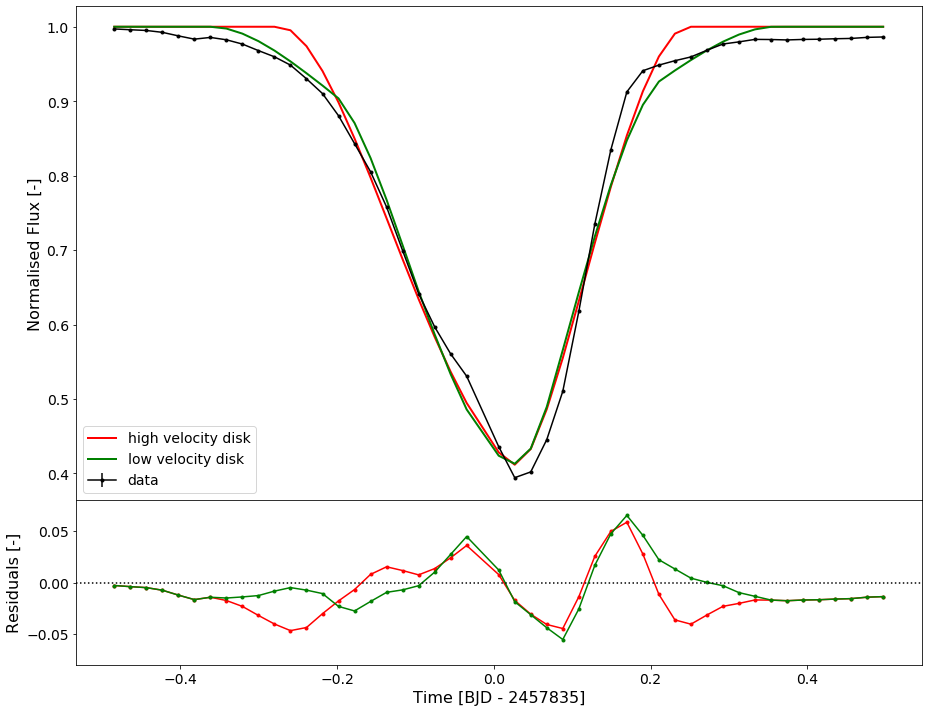

In [22]:
chi2s_fd = mcmc.plot_models(time, flux, error, 2*[fuzzy_disk], [pb_vh_fd, pb_vl_fd], 
                     ['high velocity disk', 'low velocity disk'], dt=3002, residual_lims=(-0.08, 0.08), lw=2)

In [23]:
print('chi2 for the fuzzy disk with a high velocity disk is - %.6f' % chi2s_fd[0])
print('chi2 for the fuzzy disk with a low velocity disk is  - %.6f' % chi2s_fd[1])

chi2 for the fuzzy disk with a high velocity disk is - 2512743.791566
chi2 for the fuzzy disk with a low velocity disk is  - 1982370.745709


In [24]:
# saving the best fit models for the fuzzy disks
np.save('models/best_fits/fuzzy_low_vel_disk.npy', pb_vl_fd)
np.save('models/best_fits/fuzzy_high_vel_disk.npy', pb_vh_fd)